In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"F:\DataSets\swiggy.csv")

In [8]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [9]:
df.tail()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28
8679,466488,Navrangpura,Ahmedabad,Sassy Street,250.0,2.9,80,"Chaat,Snacks,Chinese",Navrangpura,44


In [12]:
df.shape

(8680, 10)

In [14]:
df.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [17]:
df[df.duplicated()]

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time


In [19]:
df.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [20]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [32]:
df['City'].value_counts()


City
Kolkata      1346
Mumbai       1277
Chennai      1106
Pune         1090
Hyderabad    1075
Bangalore     946
Ahmedabad     717
Delhi         611
Surat         512
Name: count, dtype: int64

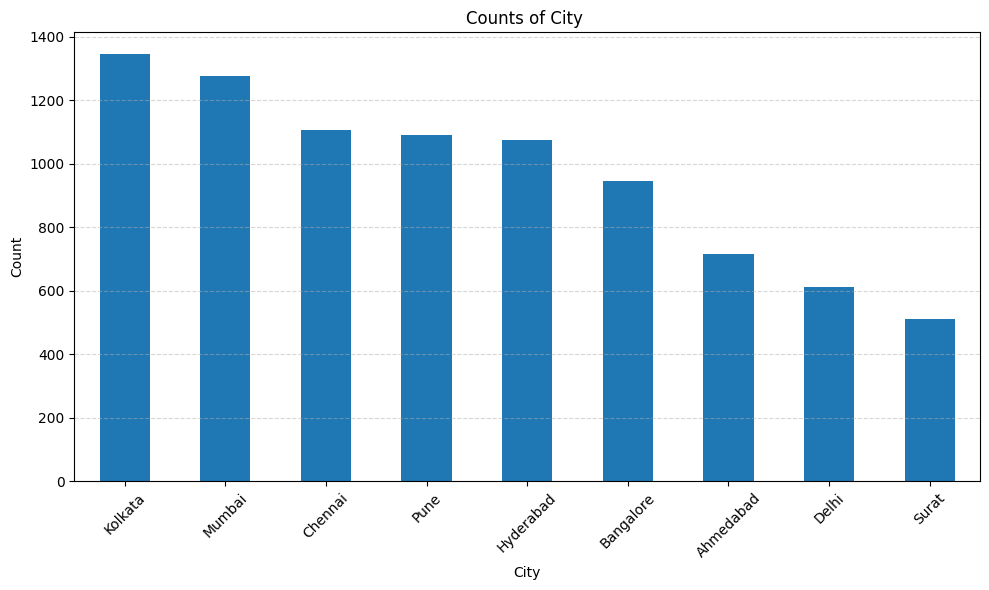

In [6]:

city_counts = df['City'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar')
plt.title('Counts of City ')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.5)  
plt.tight_layout()



plt.show()




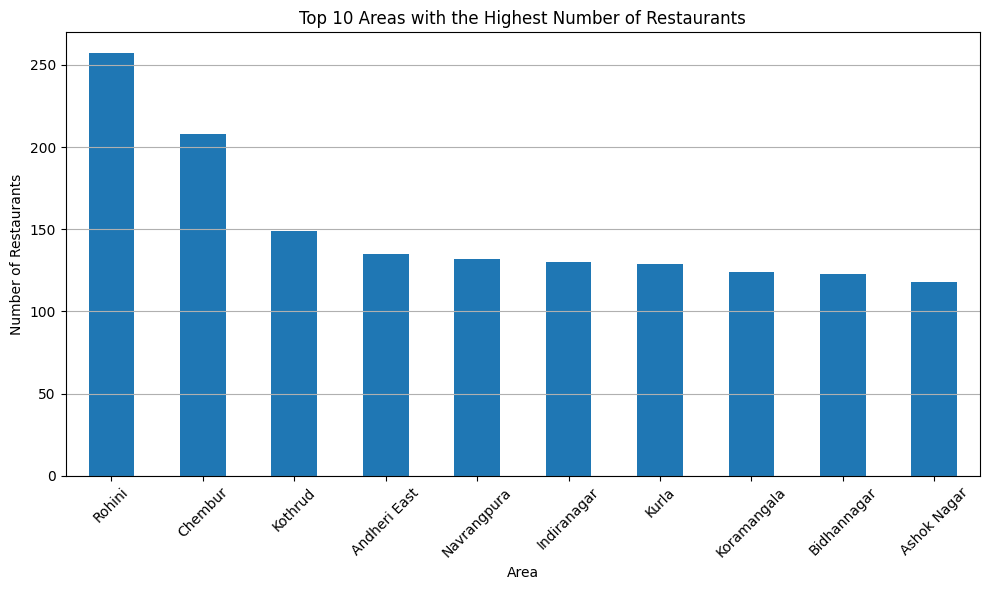

In [3]:


# Assuming your DataFrame is named df and it has columns 'Restaurant_ID' and 'Area'
# Group by the area and count the number of unique restaurant IDs in each area
area_counts = df.groupby('Area')['ID'].nunique()

# Select the top 10 areas with the highest number of restaurants
top_10_areas = area_counts.nlargest(10)

# Create a bar plot for the top 10 areas
top_10_areas.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Areas with the Highest Number of Restaurants')
plt.xlabel('Area')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines along the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


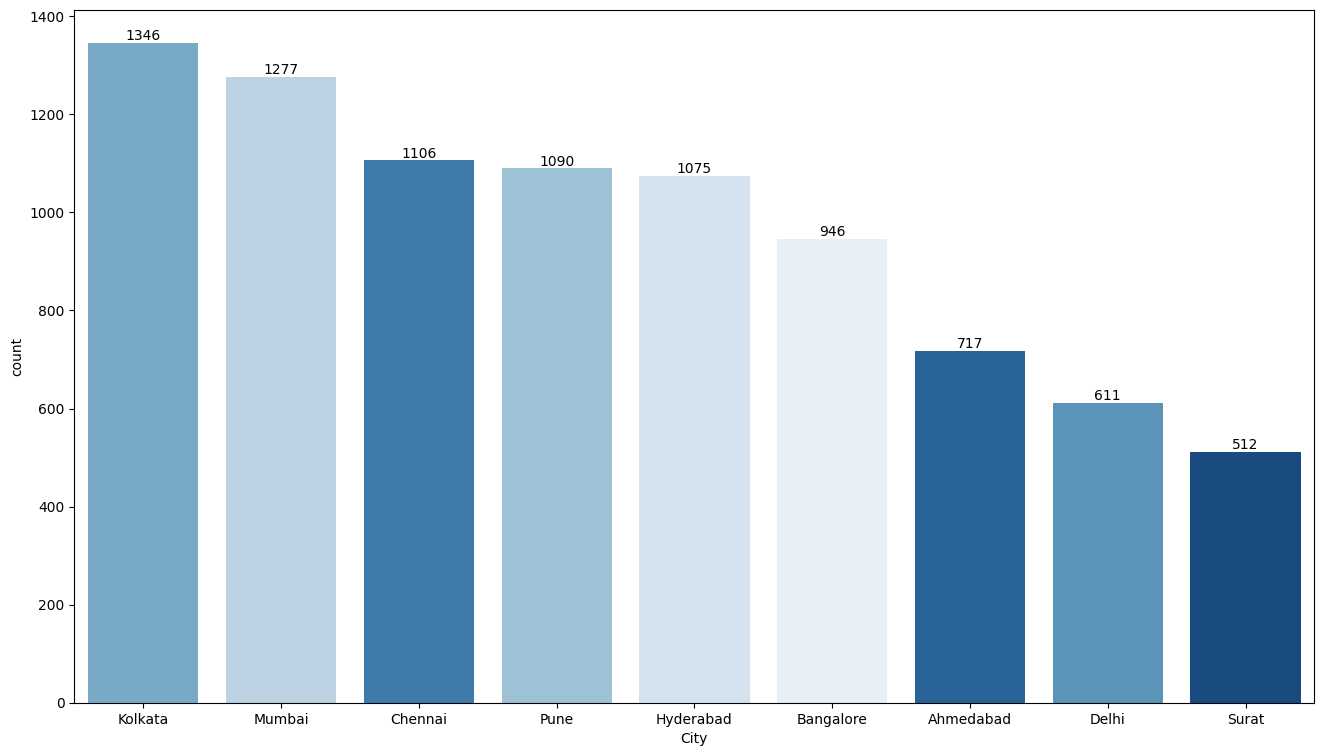

In [15]:
city_order = city_counts.index
plt.figure(figsize=(16,9))
ax = sns.countplot(data=df, x='City', hue='City' ,palette='Blues',order=city_order,legend=False)
for label in ax.containers:
    ax.bar_label(label)
plt.show()